In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bmi-dataset-linear-regression/bmi.csv


<a class="anchor" id="0"></a>

# **Linear Regression Tutorial in Python**

Hello friends,

Linear Regression is a very simple and easy to understand ML algorithm. 
Here, I build a Linear Regression model to predict BMI values based on the given features.

So, let's get started..


<a class="anchor" id="0.1"></a>
# **Table of Contents**

1. [Introduction to Linear Regression algorithm](#1)
2. [Python Library](#2)
3. [Load dataset](#3)
4. [Normal Equation (closed-form OLS)](#4)

# **1. Introduction to Linear Regression algorithm** <a class="anchor" id="1"></a>
Linear regression is a method to model the relationship between
* a dependent variable y and
* one or more independent variables x,
by fitting the best straight line (or hyperplane) through the data.

# Formula: 
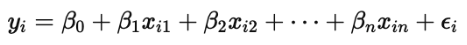
# BMI Linear Regression Model:
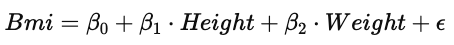

* y → target values (e.g., BMI)
* x → features (Height, Weight, etc.)
* beta → coefficients we want to calculate
* e → error term

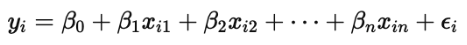

# **2. Python Library** <a class="anchor" id="2"></a>

In [2]:
import pandas as pd
import numpy as np

# **3. Load dataset** <a class="anchor" id="3"></a>

In [3]:
# ---------- Load dataset ----------
df = pd.read_csv("/kaggle/input/bmi-dataset-linear-regression/bmi.csv").head(6)

# **4. Data Description** <a class="anchor" id="4"></a>

In [4]:
# Show the first 5 rows
print(df)

   Age  Height  Weight        Bmi       BmiClass
0   61    1.85  109.30  31.935720  Obese Class 1
1   60    1.71   79.02  27.023700     Overweight
2   60    1.55   74.70  31.092612  Obese Class 1
3   60    1.46   35.90  16.841809    Underweight
4   60    1.58   97.10  38.896010  Obese Class 2
5   59    1.71   79.32  27.126295     Overweight


In [5]:
# Show general info about the dataset
print("Dataset info:")
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       6 non-null      int64  
 1   Height    6 non-null      float64
 2   Weight    6 non-null      float64
 3   Bmi       6 non-null      float64
 4   BmiClass  6 non-null      object 
dtypes: float64(3), int64(1), object(1)
memory usage: 372.0+ bytes
None


In [6]:
print("Summary statistics:")
print(df.describe())

Summary statistics:
             Age    Height      Weight        Bmi
count   6.000000  6.000000    6.000000   6.000000
mean   60.000000  1.643333   79.223333  28.819358
std     0.632456  0.139952   24.986410   7.293433
min    59.000000  1.460000   35.900000  16.841809
25%    60.000000  1.557500   75.780000  27.049349
50%    60.000000  1.645000   79.170000  29.109454
75%    60.000000  1.710000   92.655000  31.724943
max    61.000000  1.850000  109.300000  38.896010


# **5. Normal Equation (closed-form OLS)** <a class="anchor" id="6"></a>

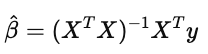

<div style="font-size:15px;">

* y = what we want to predict (BMI).
  
* .values → converts pandas column to NumPy array.

* .reshape(-1,1) → turns it into a column vector (shape = rows × 1).

* X = our predictors (Height and Weight).

* Shape = rows × 2.

</div>

In [7]:
# Step 1: pandas Series (first 6 values)
y = df["Bmi"].head(6)
print("=== pandas Series (df['Bmi'].head(6)) ===", "\n")
print("=== Type:",  type(y),  "\n")
print("=== Shape:", y.shape,  "\n")
print(y, "\n")

#0    31.935720
#1    27.023700

=== pandas Series (df['Bmi'].head(6)) === 

=== Type: <class 'pandas.core.series.Series'> 

=== Shape: (6,) 

0    31.935720
1    27.023700
2    31.092612
3    16.841809
4    38.896010
5    27.126295
Name: Bmi, dtype: float64 



In [8]:
# Step 2: NumPy 1D array (first 6 values)
y = df["Bmi"].values[:6]
print("=== NumPy 1D array (df['Bmi'].values[:6]) ===")
print(y)
print("Type:", type(y))
print("Shape:", y.shape, "\n")
# [31.9357195  27.0236996  31.09261186 16.84180897 38.89601025 27.12629527]

# Step 3: NumPy 2D column vector (first 6 values)
y = df["Bmi"].values[:6].reshape(-1, 1) # превращаем в колонку (m,1) 
print("=== NumPy 2D array (df['Bmi'].values[:6].reshape(-1,1)) ===")
print(y)
print("Type:", type(y))
print("Shape:", y.shape)
#[[31.9357195 ]
# [27.0236996 ]
# [31.09261186]
# [16.84180897]
# [38.89601025]
# [27.12629527]]

X_raw = df[["Height", "Weight"]].values[:6]
print(X_raw)
print("Type:", type(X_raw))
print("Shape:", X_raw.shape)

x = np.column_stack([np.ones(X_raw.shape[0]), X_raw])
print(x)
print("Type:", type(x))
print("Shape:", x.shape)

=== NumPy 1D array (df['Bmi'].values[:6]) ===
[31.9357195  27.0236996  31.09261186 16.84180897 38.89601025 27.12629527]
Type: <class 'numpy.ndarray'>
Shape: (6,) 

=== NumPy 2D array (df['Bmi'].values[:6].reshape(-1,1)) ===
[[31.9357195 ]
 [27.0236996 ]
 [31.09261186]
 [16.84180897]
 [38.89601025]
 [27.12629527]]
Type: <class 'numpy.ndarray'>
Shape: (6, 1)
[[  1.85 109.3 ]
 [  1.71  79.02]
 [  1.55  74.7 ]
 [  1.46  35.9 ]
 [  1.58  97.1 ]
 [  1.71  79.32]]
Type: <class 'numpy.ndarray'>
Shape: (6, 2)
[[  1.     1.85 109.3 ]
 [  1.     1.71  79.02]
 [  1.     1.55  74.7 ]
 [  1.     1.46  35.9 ]
 [  1.     1.58  97.1 ]
 [  1.     1.71  79.32]]
Type: <class 'numpy.ndarray'>
Shape: (6, 3)


# **6. Gradient Descent** <a class="anchor" id="7"></a>

# **7. Loss Function** <a class="anchor" id="5"></a>

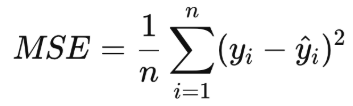

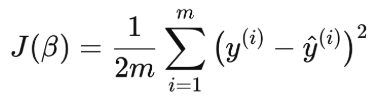

**Sum of Squared Errors (SSE)**

**MLE (Maximum Likelihood Estimation)**

**R² (coefficient of determination)**

**Adjusted R²**

**F-statistics**

**P-value**